In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
print("********************************************ANALYSIS************************************************\n\n\t\t\t\tProject topic:-Customer personal loans Prediction.\n\n\t(1)Took Data set from kaggle\n\n\t(2)I will be doing Exeploratary Data Analysis using Numpy,pandas,matplotlib and seaborn.\n\n\t(3)Will be making prediction models using number of machine learning regression algorithms.")

********************************************ANALYSIS************************************************

				Project topic:-Customer personal loans Prediction.

	(1)Took Data set from kaggle

	(2)I will be doing Exeploratary Data Analysis using Numpy,pandas,matplotlib and seaborn.

	(3)Will be making prediction models using number of machine learning regression algorithms.


In [3]:
print("*******************************************Data set description****************************************************\n\n\tThe file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.\n\nObjective:The classification goal is to predict the likelihood of a liability customer buying personal loans.")

*******************************************Data set description****************************************************

	The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

Objective:The classification goal is to predict the likelihood of a liability customer buying personal loans.


In [4]:
df=pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [5]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Features(attributes) Understanding from the above dataframe :-

The ID variable can be ignored as it will not any effect on our model. As we know customer Id is just to maitain the record in serial order. There is no relationship with Id and Loan.
Target Variable is Personal Loan which describe whether the person has taken loan or not. This is the variable which we need to predict.
Nonimal Varibles :

* ID - Customer ID
* ZIP Code - Home Address ZIP code of the customer. This variable can also be ignored becasue we can not judge the customers based on thier area or location.

 Ordinal Categorical variables :

* Family - Number of famlily member of the customer
* Education - Education level of the customer. In our dataset it ranges from 1 to 3 which are Under Graduate, Graduate and Post Graduate respectivly.

 Interval Variables :

* Age - Age of the customer
* Experience - Years of experience of customer has
* Income - Annula Income of the customer which is in dollars
* CCAvg - Avg. spending on credit cards per month which in dollars.
* Mortgage - Value of House Mortgage

 Binary Categorical Variable :

* CD Account - Does the customer have CD Account with bank or not?
* Security Account - Does the customer have Security Account with bank or not?
* Online - Does the customer have Online banking facility with bank or not?
* Credit Card - Does the customer have a credit card issued by Universal Bank or not?
* Personal Loan - This our target variable which we have to predict. This indicates that the customer has token loan or not?

### Shape of the Data

In [6]:
rows_count, columns_count = df.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Total Number of rows : 5000
Total Number of columns : 14


Shape of the dataframe is (5000, 14). There are 5000 rows and 14 columns in the dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Here we can see that all the variables are numerical. But the columns 'CD Account', 'Online', 'Family', 'Education' , 'CreditCard' and 'Securities Account' are categorical variable which should be in 'category' type.

### Checking the presence of missing values 

In [8]:
df.isnull().sum() 

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

 Here total missing values count from each column is 0 and we can see there is no missing value in the dataframe

### Missing value Visualization 

<AxesSubplot:>

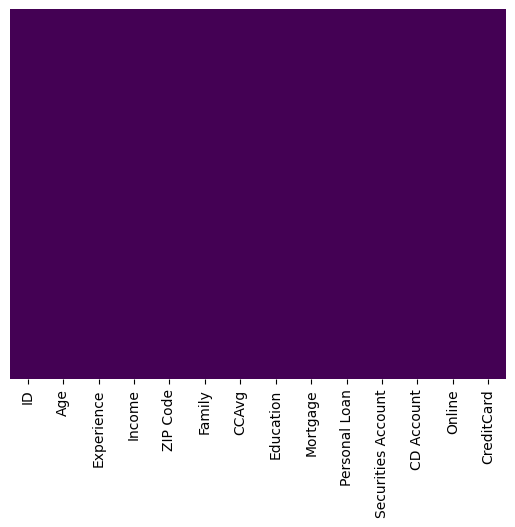

In [9]:
sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='viridis')

From the above heatmap graph we can see that there is no missing value in dataset.

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


The feature ID does not add any information, there is no realationship between Id and Loan, We can remove this row

## Binary Catagorical Data distribution

1. Personal Loan - Did this customer accept the personal loan offered in the last campaign? (Target)

2. Securities Account - Does the customer have a securities account with the bank?

3. CD Account - Does the customer have a certificate of deposit (CD) account with the bank?

4. Online - Does the customer use internet banking facilities?

5. Credit Card - Does the customer use a credit card issued by UniversalBank?

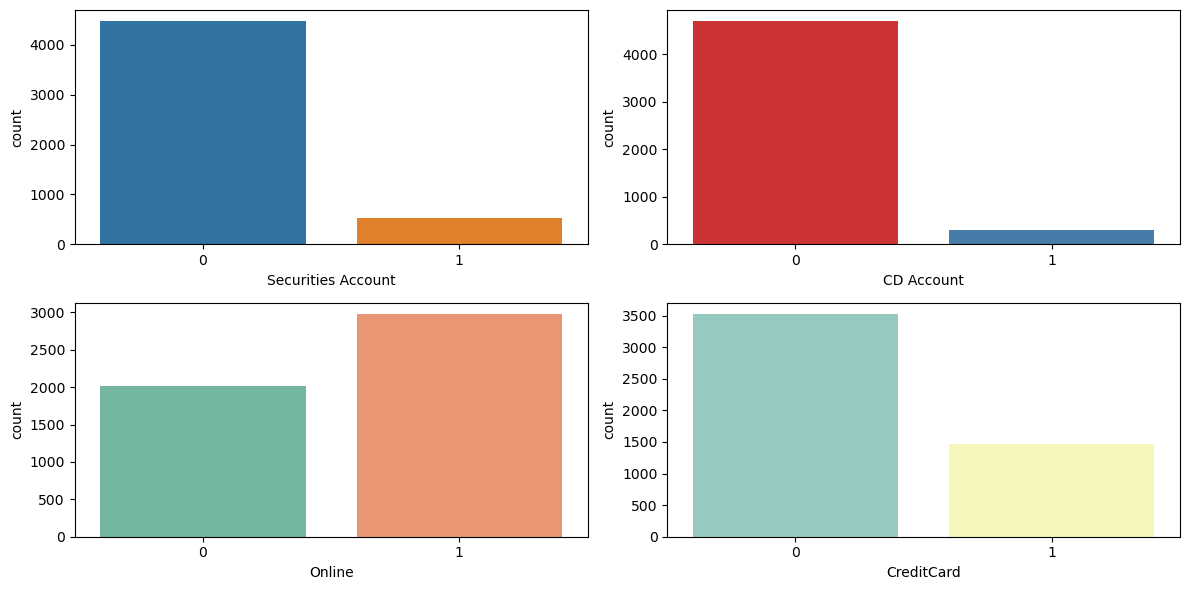

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
sns.countplot(x=df['Securities Account'],ax=axes[0,0])
sns.countplot(x=df['CD Account'],palette='Set1',ax=axes[0,1])
sns.countplot(x=df['Online'],palette='Set2',ax=axes[1,0])
sns.countplot(x=df['CreditCard'],palette='Set3',ax=axes[1,1])
fig.tight_layout()

 Watching the graphs above we can say there is a significant diffrenece among binary catagorical data encluding 'Online' feature.

### lets see how our Target variable is forming up with our other Catagorical binary data.

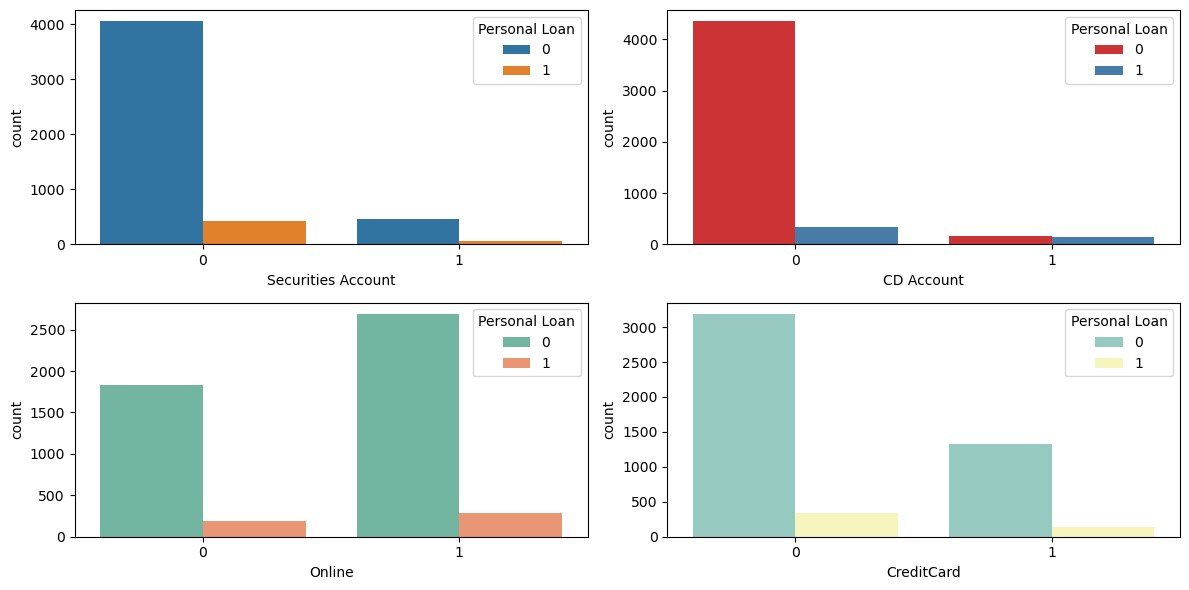

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
sns.countplot(x="Securities Account",data=df, hue="Personal Loan",ax=axes[0,0])
sns.countplot(x="CD Account",data=df, hue="Personal Loan",palette='Set1',ax=axes[0,1])
sns.countplot(x="Online",data=df, hue="Personal Loan",palette='Set2',ax=axes[1,0])
sns.countplot(x="CreditCard",data=df, hue="Personal Loan",palette='Set3',ax=axes[1,1])
fig.tight_layout()

## Observation :
1.Most of the customers who does not have 'Personal Loan' have 'Securities Account'

2.Almost All customers who has 'CD Account' have 'Personal Loan' as well.

3.Majority of customers who have 'Personal Loan' also uses 'Online banking facilities', but the difference is not so significant

4.Most of the Customer who does not have 'Personal Loan' also does not have 'Credit Card'

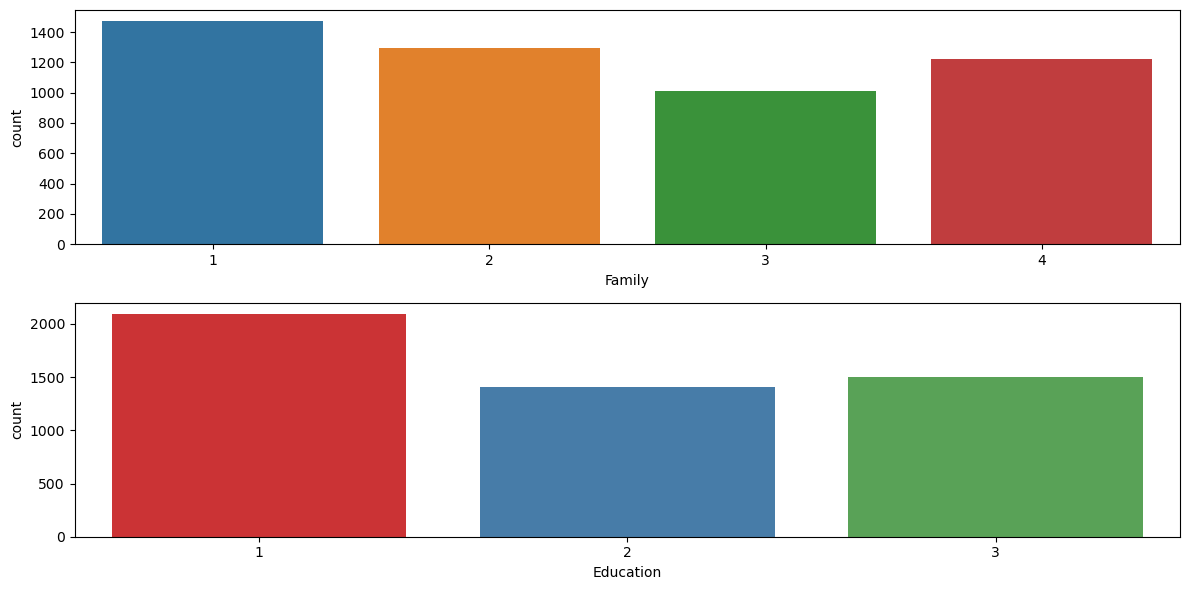

In [13]:
fig, axes = plt.subplots(2, figsize=(12, 6))
sns.countplot(x="Family",data=df,ax=axes[0])
sns.countplot(x="Education",data=df,palette='Set1',ax=axes[1])
fig.tight_layout()

1. Family - Family size of the customer

2. Education - education level of the customer (1. Undergrad 2. Graduate 3. Advanced/Professional)

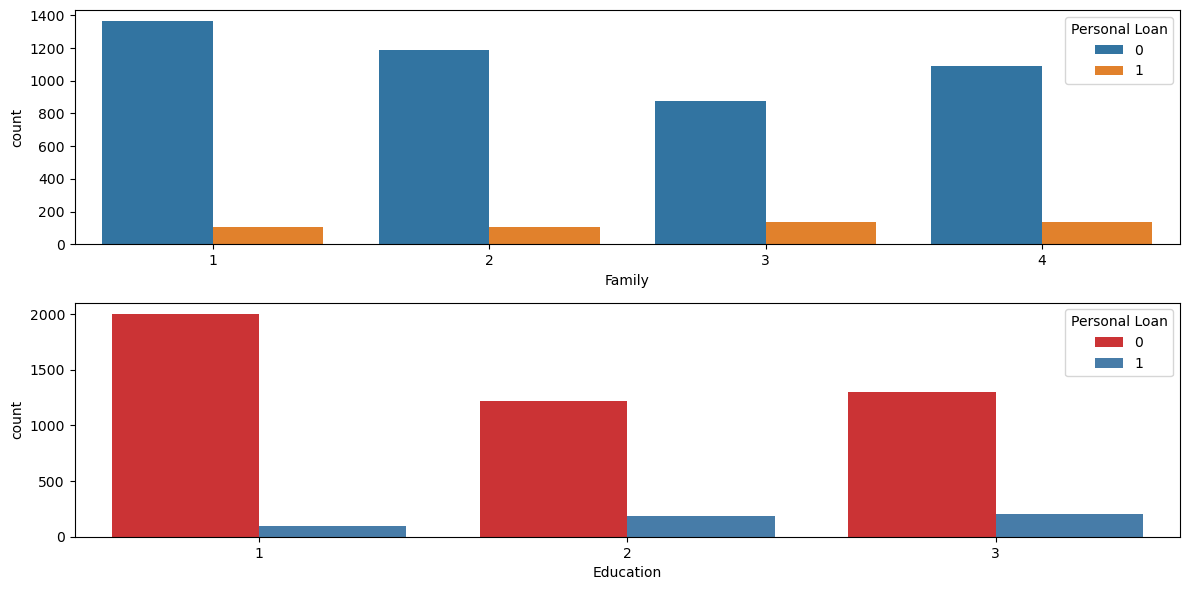

In [14]:
fig, axes = plt.subplots(2, figsize=(12, 6))
sns.countplot(x="Family",data=df, hue="Personal Loan",ax=axes[0])
sns.countplot(x="Education",data=df, hue="Personal Loan",palette='Set1',ax=axes[1])
fig.tight_layout()

### Observation :
1.Most of the customers who does not have 'Personal Loan' have one member in family, else data is not much of segregated

2.Most of the customers who does not have 'Personal Loan' are UnderGraduate, and we can see if education level increases then more customer have personal loan

In [15]:
df[['Age','Experience','Income','CCAvg','Mortgage']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


In [16]:
df[['Age','Experience','Income','CCAvg','Mortgage']].skew()

Age          -0.029341
Experience   -0.026325
Income        0.841339
CCAvg         1.598443
Mortgage      2.104002
dtype: float64

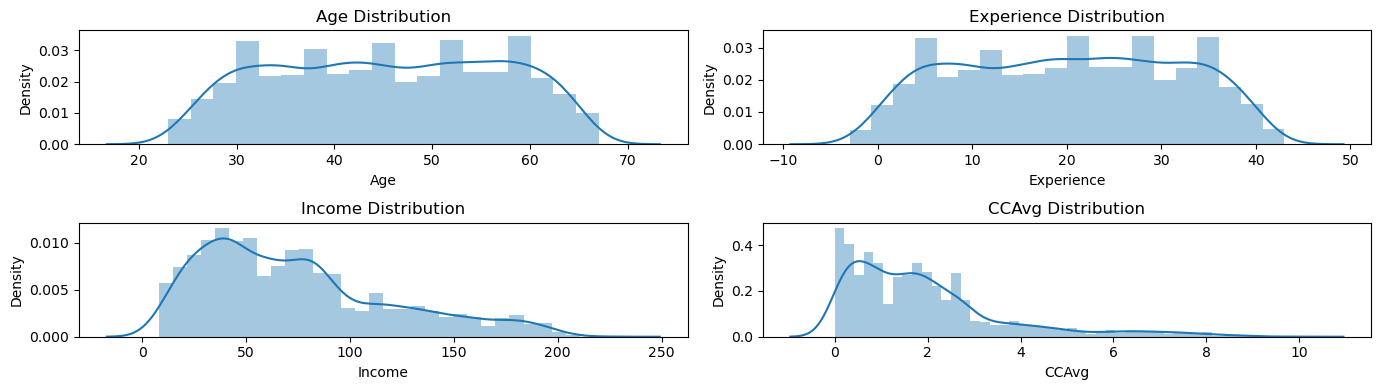

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(14, 4))
sns.distplot(df['Age'],ax=axes[0,0])
sns.distplot(df['Experience'],ax=axes[0,1])
sns.distplot(df['Income'],ax=axes[1,0])
sns.distplot(df['CCAvg'],ax=axes[1,1])
axes[0,0].set_title('Age Distribution')
axes[0,1].set_title('Experience Distribution')
axes[1,0].set_title('Income Distribution')
axes[1,1].set_title('CCAvg Distribution')
plt.tight_layout()

<AxesSubplot:xlabel='Mortgage', ylabel='Density'>

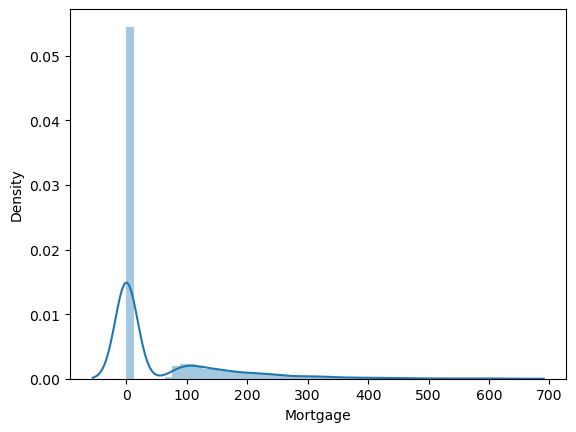

In [18]:
sns.distplot(df['Mortgage'])

### Observation :
1.Age feature is normally distributed, can be confirmed as

a. skewness is -0.029 that means very slightly left skewed

b. Mean(45.33) and Median(45.00) are very close to each other

2.Experience is normally distributed

a. skewness is -0.026 that means very slightly left skewed

b. Mean(21.10) and Median(21) are very close to each other

c.There are negative values, This could be a data input error, can simply remove as they are quite few

3.Income is positively skewed, can be confirmed as

a. skewness is 0.841 that means highly right skewed

b. Mean(73.77) is greater than the Median(64.0)

4.CCAvg is positively skewed, can be confirmed as

a. skewness is 1.598443 that means highly right skewed

b. Mean(1.93) is greater than the Median(1.5)

5.Mortgage is positively skewed, can be confirmed as

a. skewness is 2.104002 that means highly right skewed

b. Mean(56.49) is greater than the Median(0.0)

c. Most of the Customers have a mortgage of less than 40K. However the max value is 635K

In [19]:
Family_dummies= pd.get_dummies(df['Family'],drop_first=True,prefix='Family_Size')
Education_dummies= pd.get_dummies(df['Education'],drop_first=True,prefix='Education_Level')

Creating Dummy Variables for multi-Catagorical Column The reason why we create dummy variables for multi-categorical columns is that most machine learning algorithms cannot handle categorical variables directly. They require numerical data, and representing categorical variables with numerical data can be challenging.

In [20]:
df= pd.concat([df,Family_dummies,Education_dummies],axis=1)

concatinating the dummy variables to Data

In [21]:
df[['ZIP Code','ID']].var()

ZIP Code    4.502257e+06
ID          2.083750e+06
dtype: float64

 high variance means fearure does not affect the target variable

In [22]:
Cleaned_Data=df.drop(['ID','ZIP Code','Family','Education','Experience'],axis=1)

### Droping Columns
ID :: Reason=> High Variance,no correlation

ZIP Code :: Reason=> High Variance,no correlation

Family :: Reason=> Already Created Dummy Variable for this feature

Education :: Reason=> Already Created Dummy Variable for this feature

Experience :: Reason => Age and Experience are highly Correlated thus we can drop one and since Experience column also have some negative or incorrect data thus it is more feasable to drop Experience Column.

In [23]:
Cleaned_Data.head()

,Age,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_Size_2,Family_Size_3,Family_Size_4,Education_Level_2,Education_Level_3
0,25,49,1.6,0,0,1,0,0,0,0,0,1,0,0
1,45,34,1.5,0,0,1,0,0,0,0,1,0,0,0
2,39,11,1.0,0,0,0,0,0,0,0,0,0,0,0
3,35,100,2.7,0,0,0,0,0,0,0,0,0,1,0
4,35,45,1.0,0,0,0,0,0,1,0,0,1,1,0


## Preparing Test and Train Data

In [25]:
x = Cleaned_Data.drop('Personal Loan',axis=1)
y = Cleaned_Data['Personal Loan']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=10)

## LOGISTIC REGRESSION

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [29]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    
    train=model.score(xtrain,ytrain)
    test=model.score(xtest,ytest)
    
    print(f'accuracy_score:{train} \n testing accuracy:{test}')
    print(confusion_matrix(ytest,ypred))
    print(classification_report(ytest,ypred))
    return model

In [30]:
lreg=LogisticRegression()

In [40]:
mymodel(lreg)

accuracy_score:0.9577142857142857 
 testing accuracy:0.954
[[1341   19]
 [  50   90]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1360
           1       0.83      0.64      0.72       140

    accuracy                           0.95      1500
   macro avg       0.89      0.81      0.85      1500
weighted avg       0.95      0.95      0.95      1500



LogisticRegression()

### Model Scoring
1. Accuracy :: 95%

2. Re-call :: 64%

3. Precision :: 83%

4. F1-Score :: 72%

* Accuracy is not a good measure in this situation because Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign so we will go for F1-Score and 72% as out model Score.

## KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, metric='euclidean')
knn.fit(xtrain, ytrain)
y_Knnpred = knn.predict(xtest)
print(classification_report(ytest, y_Knnpred, digits=2))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1360
           1       0.44      0.44      0.44       140

    accuracy                           0.90      1500
   macro avg       0.69      0.69      0.69      1500
weighted avg       0.90      0.90      0.90      1500



In [34]:
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report,f1_score

In [35]:
myList = list(range(3,30,2))
ac_scores = []

for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    y_knnpred = knn.predict(xtest)
    scores = f1_score(ytest, y_knnpred)
    ac_scores.append(scores)
    
MSE = [1 - x for x in ac_scores]

optimal_k = myList[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 3


### Model Scoring
1. Accuracy :: 90%

2. Re-call :: 44%

3. Precision :: 44%

4. F1-Score :: 44%

* Accuracy is not a good measure in this situation because Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign so we will go for F1-Score and 44% as out model Score.

## NAIVE-BAYES ALGORITHM

In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
naive = GaussianNB()

In [41]:
mymodel(naive)

accuracy_score:0.882 
 testing accuracy:0.8806666666666667
[[1236  124]
 [  55   85]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1360
           1       0.41      0.61      0.49       140

    accuracy                           0.88      1500
   macro avg       0.68      0.76      0.71      1500
weighted avg       0.91      0.88      0.89      1500



GaussianNB()

### Model Scoring
1. Accuracy :: 88%

2. Re-call :: 61%

3. Precision :: 41%

4. F1-Score :: 49%

* Accuracy is not a good measure in this situation because Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign so we will go for F1-Score and 49% as out model Score.

## DECISION TREE

In [42]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

In [43]:
dt=DecisionTreeRegressor()

In [44]:
mymodel(dt)

accuracy_score:1.0 
 testing accuracy:0.8109243697478992
[[1349   11]
 [  13  127]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1360
           1       0.92      0.91      0.91       140

    accuracy                           0.98      1500
   macro avg       0.96      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500



DecisionTreeRegressor()

### Model Scoring
1. Accuracy :: 98%

2. Re-call :: 91%

3. Precision :: 92%

4. F1-Score :: 91%

* Accuracy is not a good measure in this situation because Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign so we will go for F1-Score and 91% as out model Score.